## Estadística Aplicada

Sesión 16 - 28 septiembre

Patricio Ruiz Rodriguez 1897914

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import yfinance as yf
## Tamaño de gráfica
plt.rcParams['figure.figsize']=(10,6)

In [9]:
walmex = yf.download('WALMEX.MX',
                     start='2016-01-01',
                     end='2022-12-31',
                     progress=False)

In [11]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,42.959999,43.299999,42.299999,42.840000,35.479034,6483179
2016-01-05,42.849998,43.900002,42.540001,42.660000,35.329964,8115974
2016-01-06,42.650002,43.020000,42.070000,42.380001,35.098072,12511056
2016-01-07,41.320000,42.240002,39.259998,39.990002,33.118729,18124494
2016-01-08,40.990002,41.490002,40.700001,41.029999,33.980038,15949791


In [12]:
walmex = walmex[['Adj Close']]

In [13]:
walmex.head()

,Adj Close
Date,
2016-01-04,35.479034
2016-01-05,35.329964
2016-01-06,35.098072
2016-01-07,33.118729
2016-01-08,33.980038


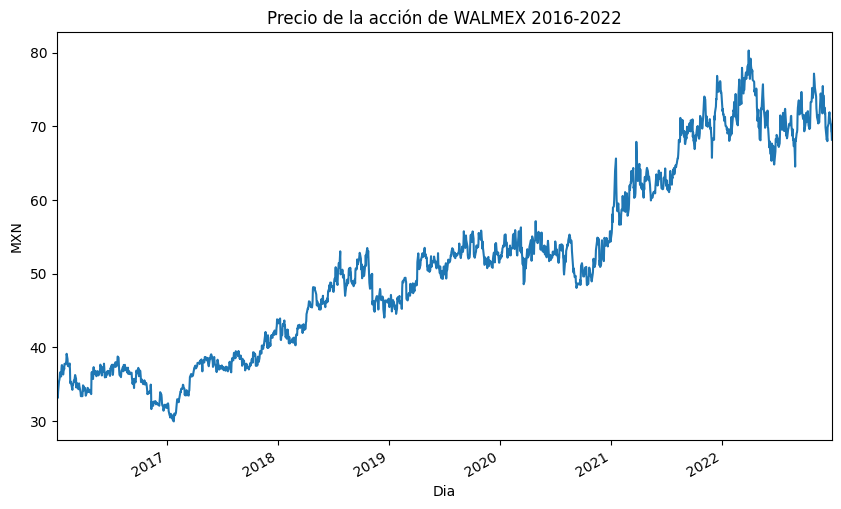

In [22]:
## Graficar
walmex['Adj Close'].plot()
plt.title('Precio de la acción de WALMEX 2016-2022')
plt.ylabel('MXN')
plt.xlabel('Dia')
plt.xlim('2016-01-04','2022-12-30');

In [18]:
walmex.head(1)

,Adj Close
Date,
2016-01-04,35.479034


In [19]:
walmex.tail(1)

,Adj Close
Date,
2022-12-30,68.158188


In [25]:
## Calcular PMS-10 y PMS-50

## Señal de corto plazo
walmex['PMS-10'] = walmex['Adj Close'].rolling(10).mean()
## Señal de largo plazo
walmex['PMS-50'] = walmex['Adj Close'].rolling(50).mean()

C:\Users\FCFM\AppData\Local\Temp\ipykernel_5172\3935311032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-10'] = walmex['Adj Close'].rolling(10).mean()
C:\Users\FCFM\AppData\Local\Temp\ipykernel_5172\3935311032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-50'] = walmex['Adj Close'].rolling(50).mean()


In [26]:
walmex

,Adj Close,PMS-10,PMS-50
Date,,,
2016-01-04,35.479034,NaN,NaN
2016-01-05,35.329964,NaN,NaN
2016-01-06,35.098072,NaN,NaN
2016-01-07,33.118729,NaN,NaN
2016-01-08,33.980038,NaN,NaN
...,...,...,...
2022-12-26,70.354919,70.106554,72.220190
2022-12-27,70.285660,70.320291,72.202119
2022-12-28,69.266449,70.407368,72.184242


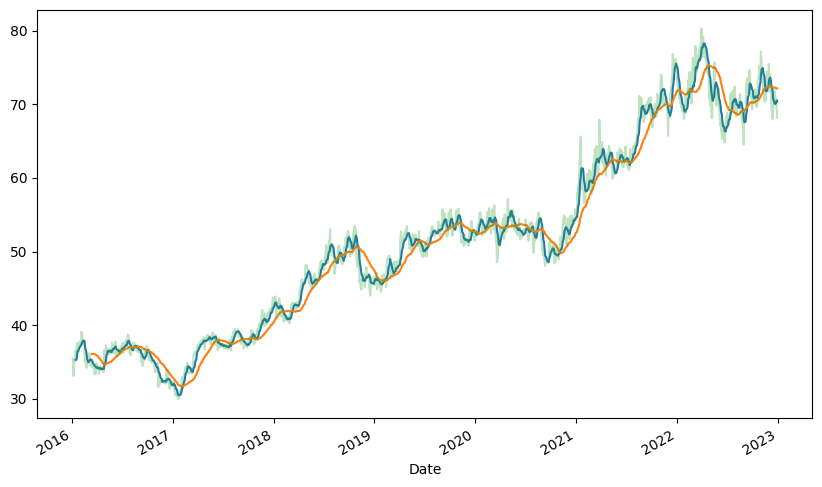

In [33]:
walmex['PMS-10'].plot()
walmex['PMS-50'].plot()
## Alpha = 0 transparenta, Alpha = 1 no transparenta
walmex['Adj Close'].plot(alpha=0.3);

In [31]:
## Estrategia
walmex['Estrategia'] = walmex['PMS-10']>walmex['PMS-50']

C:\Users\FCFM\AppData\Local\Temp\ipykernel_5172\3244544488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['Estrategia'] = walmex['PMS-10']>walmex['PMS-50']


In [35]:
walmex.head()
## False-No compramos   True-Compramos

,Adj Close,PMS-10,PMS-50,Estrategia
Date,,,,
2016-01-04,35.479034,NaN,NaN,False
2016-01-05,35.329964,NaN,NaN,False
2016-01-06,35.098072,NaN,NaN,False
2016-01-07,33.118729,NaN,NaN,False
2016-01-08,33.980038,NaN,NaN,False


retorno = $\frac{P_t-P_{t-1}}{P{t-1}} $

In [38]:
## pct_change
walmex['Retorno'] = walmex['Adj Close'].pct_change()

C:\Users\FCFM\AppData\Local\Temp\ipykernel_5172\1595417209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['Retorno'] = walmex['Adj Close'].pct_change()


In [40]:
walmex.head()

,Adj Close,PMS-10,PMS-50,Estrategia,Retorno
Date,,,,,
2016-01-04,35.479034,NaN,NaN,False,NaN
2016-01-05,35.329964,NaN,NaN,False,-0.004202
2016-01-06,35.098072,NaN,NaN,False,-0.006564
2016-01-07,33.118729,NaN,NaN,False,-0.056395
2016-01-08,33.980038,NaN,NaN,False,0.026007


<Axes: xlabel='Date'>

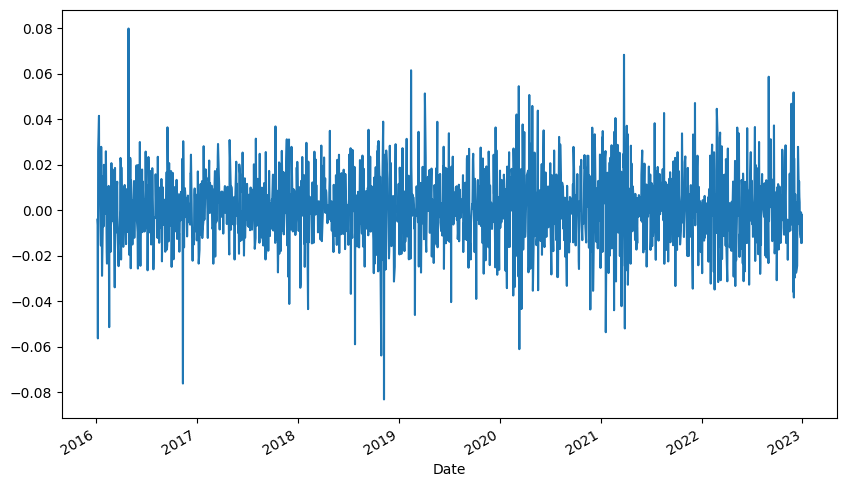

In [41]:
## Graficar retornos
walmex['Retorno'].plot()
